#### benchmark case

5.554905704775273e-107


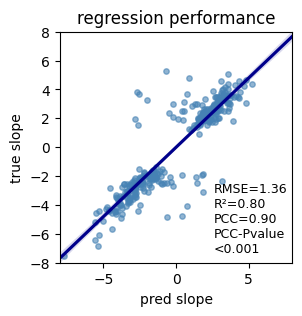

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

# load datasets
y_true = np.load('../datasets/case_datasets/pred_results_slope/small_label.npy')[0:300] 
y_pred = np.load('../datasets/case_datasets/pred_results_slope/small_predict.npy')[0:300] 

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
pcc = pearsonr(y_true, y_pred)[0]
pcc_pvalue = pearsonr(y_true, y_pred)[1]
print(pcc_pvalue)

ax = plt.subplots(figsize=(3,3))
plt.ylabel("true slope")
plt.xlabel("pred slope")
plt.xlim((-8, 8))
plt.ylim((-8, 8))
sns.regplot(x=y_pred,y=y_true,x_jitter = 0.15,y_jitter = 0,
            scatter_kws = {'color':'#4682B4','alpha':0.6,'s':15}, line_kws={"color": "#00008B"},truncate=False)
plt.title('regression performance')

plt.text(2.6,-7.3,'RMSE=%.2f\nR²=%.2f\nPCC=%.2f\nPCC-Pvalue\n<0.001'%(rmse,r2,pcc), fontsize=9)
plt.savefig('images/case/replot-small.png',dpi=300, bbox_inches = 'tight')
plt.show()

(300,)
(300, 768)
(300, 2)


<Figure size 640x480 with 0 Axes>

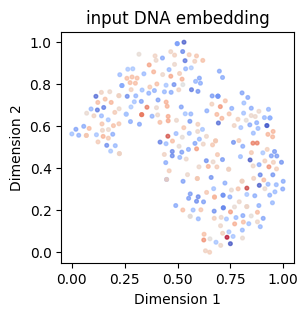

(300, 16)
(300, 2)


<Figure size 640x480 with 0 Axes>

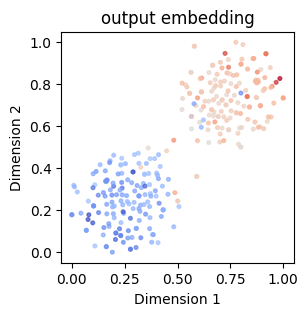

(300, 16)
(300, 2)


<Figure size 640x480 with 0 Axes>

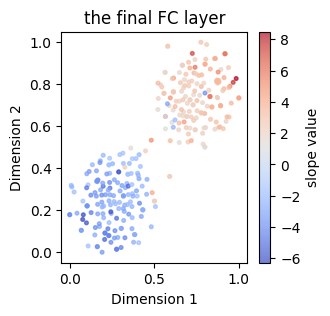

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

def plot_embedding(data, label, title):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)

    fig = plt.figure()
    ax = plt.subplot(111)
    for i in range(data.shape[0]):
        plt.text(data[i, 0], data[i, 1], str(label[i]),
                 color=plt.cm.Set1(label[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    return fig


# load datasets
input = np.load("../datasets/case_datasets/small_input.npy",allow_pickle=True)[0:300] 
output = np.load("../datasets/case_datasets/small_output.npy",allow_pickle=True)[0:300] 
label = np.load("../datasets/case_datasets/small_label.npy",allow_pickle=True)[0:300] 
print(label.shape)

stack = input

fig = plt.figure()
tsne = TSNE(n_components=2, init='pca', random_state=0)
print(stack.shape)
result = tsne.fit_transform(stack)
print(result.shape)
#fig = plot_embedding(result, label,'t-SNE embedding of the digits')
x_min, x_max = np.min(result, 0), np.max(result, 0)
result = (result - x_min) / (x_max - x_min)

num = result.shape[0]
ax = plt.subplots(figsize=(3,3))
sizes = label

plt.scatter(result[:,0], result[:,1], c=sizes, s=7, cmap='coolwarm', alpha=0.7)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('input DNA embedding')
plt.savefig('images/case/slope-input-small.png',dpi=300, bbox_inches = 'tight')
plt.show()

fig = plt.figure()
tsne = TSNE(n_components=2, init='pca', random_state=0)
print(output.shape)
result = tsne.fit_transform(output)
print(result.shape)
#fig = plot_embedding(result, label,'t-SNE embedding of the digits')
x_min, x_max = np.min(result, 0), np.max(result, 0)
result = (result - x_min) / (x_max - x_min)

num = result.shape[0]
ax = plt.subplots(figsize=(3,3))
sizes = label

plt.scatter(result[:,0], result[:,1], c=sizes, s=7, cmap='coolwarm', alpha=0.7)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('output embedding')
plt.savefig('images/case/slope-output-small.png',dpi=300, bbox_inches = 'tight')
plt.show()

fig = plt.figure()
tsne = TSNE(n_components=2, init='pca', random_state=0)
print(output.shape)
result = tsne.fit_transform(output)
print(result.shape)
#fig = plot_embedding(result, label,'t-SNE embedding of the digits')
x_min, x_max = np.min(result, 0), np.max(result, 0)
result = (result - x_min) / (x_max - x_min)

num = result.shape[0]
ax = plt.subplots(figsize=(3,3))
sizes = label

plt.scatter(result[:,0], result[:,1], c=sizes, s=7, cmap='coolwarm', alpha=0.7)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('the final FC layer')
plt.colorbar(label='slope value', orientation='vertical') 
plt.savefig('images/case/slope-output-small-legend.png',dpi=300, bbox_inches = 'tight')
plt.show()



(45675,)
(192942,)
0.0


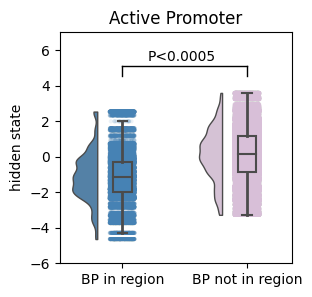

In [3]:
import matplotlib.collections as clt
import ptitprince as pt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

type_list = ['active_promoter']
output_path = '../datasets/case_datasets/results/'

palettes = [
    ['#4682B4', '#D8BFD8'],   
]

type = type_list[0]
type_array = np.load(output_path + type + '_small.npy')[0:45675]

not_type_array = np.load(output_path + type + '_not_small.npy')[0:192942]
print(type_array.shape)
print(not_type_array.shape)

df = pd.DataFrame(type_array, columns=['score'])
df['group'] = 'group1'
df_not = pd.DataFrame(not_type_array, columns=['score'])
df_not['group'] = 'group2'

data = pd.concat([df,df_not])

y_max=4
y_min=-7

pvalue = stats.mannwhitneyu(df['score'].dropna(),df_not['score'])[1]
print(pvalue)

dx="group"; dy="score"; ort="h"; pal=palettes[0]; sigma=.2
f, ax=plt.subplots(figsize=(3, 3))
plt.ylim((-6, 7))
plt.xlim((-1.5, 1))
pt.RainCloud(x=dx, y=dy, data=data, palette=pal, bw=sigma, box_sym='', rain_alpha = .1,
            width_viol = .4, ax = ax)

plt.plot([0,1], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10], linewidth=1, color='k') 
plt.plot([0,0], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') 
plt.plot([1,1], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') 

plt.text(0.2,y_max+(y_max-y_min)/8,f'P<0.0005',fontsize=10,color='k')

plt.xlabel("")
plt.ylabel("hidden state")
plt.xticks([0,1],['BP in region','BP not in region'])
plt.title('Active Promoter')
plt.savefig('images/case/raincloud-small-' + type + '.png',dpi=300, bbox_inches = 'tight')
plt.show()

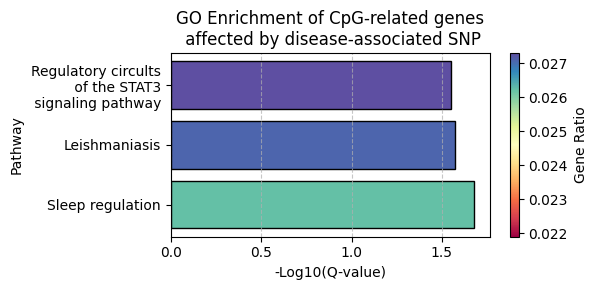

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data_all = {
    'Pathway': [
        'Sleep regulation',
        'Leishmaniasis',
        'Regulatory circults\n of the STAT3\n signaling pathway'
    ],
    'Gene Ratio': [0.0219, 0.0262, 0.0273],
    'Count': [4, 5, 5],
    'Q-value': [-1.68, -1.57, -1.55]  # Log10(q)
}
df = pd.DataFrame(data_all)
plt.figure(figsize=(6, 3))
# Sort the data for better visual arrangement
df_sorted = df.sort_values('Q-value', ascending=True)

# Create the bar plot
bars = plt.barh(
    df_sorted['Pathway'],
    -df_sorted['Q-value'],  # Use -log10(Q-value) for the x-axis
    color=plt.cm.Spectral(df_sorted['Gene Ratio'] / max(df_sorted['Gene Ratio'])),  # Color by Gene Ratio
    edgecolor='black'
)

# Add a color bar to represent Gene Ratio
sm = plt.cm.ScalarMappable(cmap='Spectral', norm=plt.Normalize(vmin=min(df_sorted['Gene Ratio']), vmax=max(df_sorted['Gene Ratio'])))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Gene Ratio')

# Add labels and title
plt.xlabel('-Log10(Q-value)')
plt.ylabel('Pathway')
plt.title('GO Enrichment of CpG-related genes\n affected by disease-associated SNP')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.savefig('images/case/GO result.png',dpi=300, bbox_inches = 'tight')
plt.show()

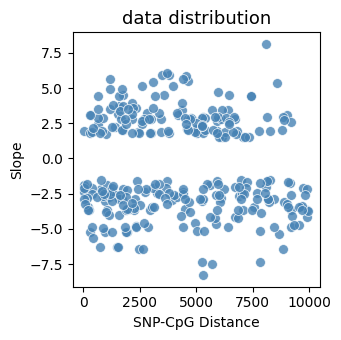

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../datasets/meqtl_slope_merged.csv')[0:300]
tissue_types = df['tissue'].unique()
morandi_palette = {
    'CD4': '#4682B4',   
}

fig, ax = plt.subplots(1, 1, figsize=(3.5, 3.5), sharey=True)
tissue = 'CD4'
subset = df[df['tissue'] == tissue]
sns.scatterplot(x='distance', y='beta', data=subset, ax=ax, s=50, color=morandi_palette[tissue], legend=False, alpha=0.8)
ax.set_title('data distribution', fontsize=13)
ax.set_xlabel('SNP-CpG Distance')
ax.set_ylabel('Slope')
plt.tight_layout()
plt.savefig('images/case/meqtl-slope-tssdistance.png',dpi=300, bbox_inches = 'tight')
plt.show()